In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df_fact_bookings = pd.read_csv("datasets/fact_bookings.csv")
df_fact_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [4]:
df_fact_bookings.shape
#To identify no of rows and cols

(134590, 12)

In [5]:
df_fact_bookings.describe()
# quick statistics on the numeric columns 
#note: need to handle -17 as min value in no_guests

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [6]:
print(df_fact_bookings.revenue_generated.min(),df_fact_bookings.revenue_generated.max())
#revenue_generated col in describe has e value so
#shows max revenue generated per booking(?) need to handle

6500 28560000


In [7]:
df_fact_bookings.room_category.unique()
#identifying the columns unique values

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [8]:
df_fact_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [9]:
df_fact_bookings.booking_platform.value_counts()
# To identify total bookings per platform

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel='booking_platform'>

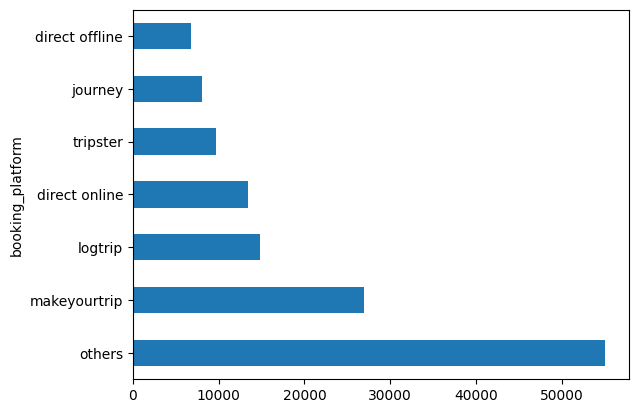

In [10]:
df_fact_bookings.booking_platform.value_counts().plot(kind="barh")

In [11]:
df_fact_bookings.ratings_given.unique()
#note: has nan values

array([ 1., nan,  5.,  4.,  3.,  2.])

In [12]:
df_fact_bookings.booking_status.unique()

array(['Checked Out', 'Cancelled', 'No Show'], dtype=object)

In [13]:
df_fact_agg_bookings = pd.read_csv("datasets/fact_aggregated_bookings.csv")
df_dim_date = pd.read_csv("datasets/dim_date.csv")
df_dim_hotels = pd.read_csv("datasets/dim_hotels.csv")
df_dim_rooms = pd.read_csv("datasets/dim_rooms.csv")

In [14]:
df_dim_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [15]:
df_dim_hotels.property_name.unique()


array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [16]:
df_dim_hotels.property_name.value_counts()

property_name
Atliq Grands     4
Atliq Exotica    4
Atliq City       4
Atliq Blu        4
Atliq Bay        4
Atliq Palace     4
Atliq Seasons    1
Name: count, dtype: int64

In [17]:
df_dim_hotels.category.unique()

array(['Luxury', 'Business'], dtype=object)

In [18]:
df_dim_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [19]:
df_dim_hotels.shape

(25, 4)

In [20]:
df_dim_hotels.city.unique()

array(['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore'], dtype=object)

In [21]:
df_dim_hotels.city.value_counts().sort_values()

city
Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: count, dtype: int64

In [22]:
df_dim_rooms.head(4)

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [23]:
df_fact_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0


In [24]:
df_fact_agg_bookings.property_id.unique()


array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [25]:
#total bookings per property
df_fact_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [26]:
#days where bookings are greater than capacity
df_fact_agg_bookings[df_fact_agg_bookings.successful_bookings > df_fact_agg_bookings.capacity]
    

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [27]:
#property having the highest capacity
df_fact_agg_bookings[df_fact_agg_bookings.capacity==df_fact_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


In [28]:
df_fact_bookings.describe()
#there are -ve values in no of guests

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [29]:
df_fact_bookings[df_fact_bookings.no_guests<=0]
#finding all the rows with -ve no_guests

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [30]:
# there are 9 such rows out of 134590 rows
#therefore these rows can be removed

In [31]:
df_fact_bookings = df_fact_bookings[df_fact_bookings.no_guests>0]
df_fact_bookings.shape

(134578, 12)

In [32]:
print(df_fact_bookings.revenue_generated.min(),df_fact_bookings.revenue_generated.max())

6500 28560000


In [33]:
#28560000 is way too much of revenue_generated for a single booking which is an outlier
#3 std to remove outliers

In [34]:
avg_rg,std_rg = df_fact_bookings.revenue_generated.mean(),df_fact_bookings.revenue_generated.std()


In [35]:
avg_rg,std_rg


(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [36]:
higher_limit_rg=avg_rg+ 3*std_rg
higher_limit_rg

np.float64(294498.50173207896)

In [37]:
lower_limit_rg=avg_rg- 3*std_rg
lower_limit_rg

np.float64(-263742.4278567056)

In [38]:
df_fact_bookings[df_fact_bookings.revenue_generated<0]
# therefore no outliers wrt lower_limit_rg

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [39]:
df_fact_bookings[df_fact_bookings.revenue_generated>higher_limit_rg]
#remove the rows with outliers

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [40]:
df_fact_bookings=df_fact_bookings[df_fact_bookings.revenue_generated<higher_limit_rg]
df_fact_bookings.shape

(134573, 12)

In [41]:
df_fact_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134573.000000,134573.000000,56676.000000,134573.000000,134573.000000
mean,18061.191658,2.036716,3.619045,14915.959776,12695.983585
std,1093.042273,1.031673,1.234983,6452.676164,6927.791692
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [42]:
df_fact_bookings.isnull().sum()


booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [43]:
#ratings_given has 77897 nan values but not hadling it as it can be that way

In [44]:
#finding nan values in df_fact_agg_bookings and handling it

In [45]:
df_fact_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [46]:
df_fact_agg_bookings[df_fact_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [47]:
df_fact_agg_bookings.capacity.median()

np.float64(25.0)

In [48]:
df_fact_agg_bookings["capacity"] = (
    df_fact_agg_bookings["capacity"]
    .fillna(df_fact_agg_bookings["capacity"].median())
)

In [49]:
df_fact_agg_bookings.loc[[8,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
15,17563,1-May-22,RT1,21,25.0


In [50]:
# in df_fact_agg_bookingswhere bookings are greater than capacity and hadling it

In [51]:
df_fact_agg_bookings[df_fact_agg_bookings.successful_bookings > df_fact_agg_bookings.capacity]


,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [52]:
df_fact_agg_bookings.shape

(9200, 5)

In [53]:
#removed the error values
df_fact_agg_bookings= df_fact_agg_bookings[df_fact_agg_bookings.successful_bookings <= df_fact_agg_bookings.capacity]
df_fact_agg_bookings.shape

(9194, 5)

In [54]:
df_fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


In [55]:
#occupancy %
df_fact_agg_bookings["occ_pct"] = df_fact_agg_bookings.successful_bookings/df_fact_agg_bookings.capacity

In [56]:
df_fact_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000


In [57]:
df_fact_agg_bookings["occ_pct"]=df_fact_agg_bookings["occ_pct"].apply( lambda x: round(x*100,2))
df_fact_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74


In [58]:
#Average Occupancy rate in each of the room categories

In [59]:
df_fact_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    57.89
RT2    58.01
RT3    58.03
RT4    59.28
Name: occ_pct, dtype: float64

In [60]:
df_dim_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [61]:
df=pd.merge(df_fact_agg_bookings,df_dim_rooms,left_on="room_category",right_on="room_id")
df.tail(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
9190,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9191,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9192,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9193,17561,31-Jul-22,RT4,3,4.0,75.00,RT4,Presidential


In [62]:
df.drop("room_id",axis=1,inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard


In [63]:
avg_occ_pct=df.groupby("room_class")["occ_pct"].mean().round(2)
avg_occ_pct

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: occ_pct, dtype: float64

<Axes: xlabel='room_class'>

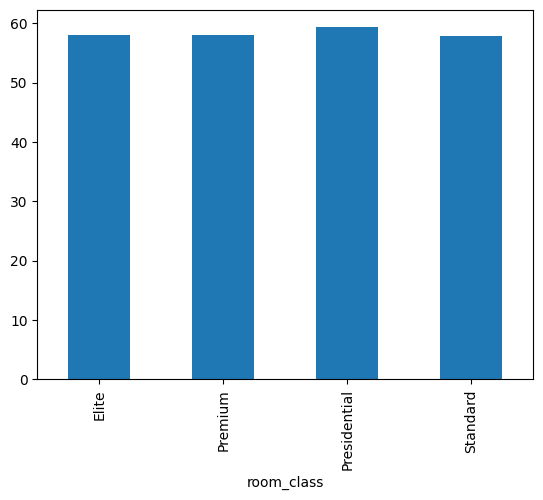

In [64]:
avg_occ_pct.plot(kind="bar")

In [65]:
# Average occupancy rate per city

In [66]:
df_dim_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [67]:
df=pd.merge(df,df_dim_hotels,on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore


In [68]:
avg_occ_pct=df.groupby("city")["occ_pct"].mean().round(2)
avg_occ_pct

city
Bangalore    56.33
Delhi        61.51
Hyderabad    58.12
Mumbai       57.91
Name: occ_pct, dtype: float64

<Axes: xlabel='city'>

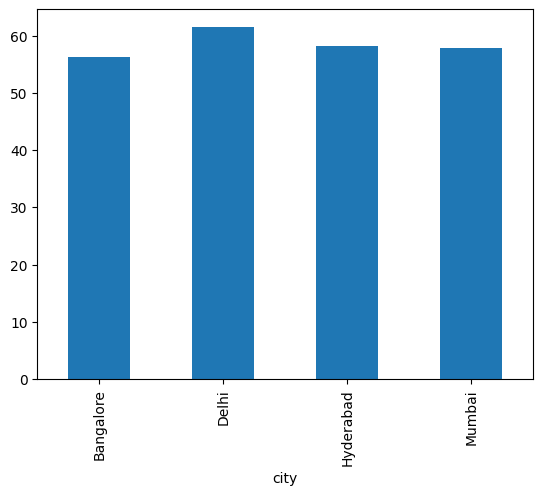

In [69]:
avg_occ_pct.plot(kind="bar")

In [70]:
# when was the occupancy better? weekday or weekend

In [71]:
df_dim_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [72]:
df=pd.merge(df,df_dim_date,left_on="check_in_date",right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [73]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: occ_pct, dtype: float64

In [74]:
#In the month of june what is the occupancy for different cities

In [75]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [76]:
df_june_22=df[df["mmm yy"]=="Jun 22"]
df_june_22.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday


In [77]:
occ_pct_june=df_june_22.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending=False)
occ_pct_june


city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.44
Name: occ_pct, dtype: float64

<Axes: ylabel='city'>

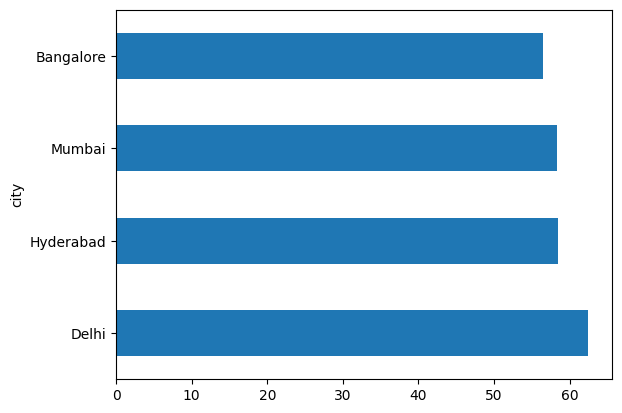

In [78]:
occ_pct_june.plot(kind="barh")

In [79]:
#Append new data for the moth of august to the existing data

In [80]:
df_august=pd.read_csv("datasets/new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [81]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [82]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [83]:
df_august.shape

(7, 13)

In [84]:
df.shape

(6497, 14)

In [85]:
latest_df=pd.concat([df,df_august],ignore_index=True,axis=0)
latest_df.tail(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [86]:
#Revenue realized per city

In [87]:
df_fact_bookings.head(4)


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [88]:
df_dim_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [89]:
df_bookings_all=pd.merge(df_fact_bookings,df_dim_hotels,on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [90]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

In [91]:
#Revenue realized per hotel

In [92]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum()

property_name
Atliq Bay        259996918
Atliq Blu        260851922
Atliq City       285798439
Atliq Exotica    320258588
Atliq Grands     211462134
Atliq Palace     304081863
Atliq Seasons     66086735
Name: revenue_realized, dtype: int64

In [93]:
#month by month revenue

In [94]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [95]:
df_dim_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [96]:
df_dim_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [97]:
pd.merge(df_bookings_all,df_dim_date,left_on="check_in_date",right_on ="date")

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


In [98]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [99]:
df_dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [100]:
# note: need to convert check_in_date  and mmm yy to date type from object type
df_dim_date["date"] = pd.to_datetime(
    df_dim_date["date"],
    format="mixed"
)
df_dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [101]:
df_bookings_all["check_in_date"] = pd.to_datetime(
  df_bookings_all["check_in_date"],
    format="mixed"
)
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [102]:
df_bookings_all=pd.merge(df_bookings_all,df_dim_date,left_on="check_in_date",right_on ="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [103]:
monthly_rev_realized= df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()
monthly_rev_realized

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

<Axes: xlabel='mmm yy'>

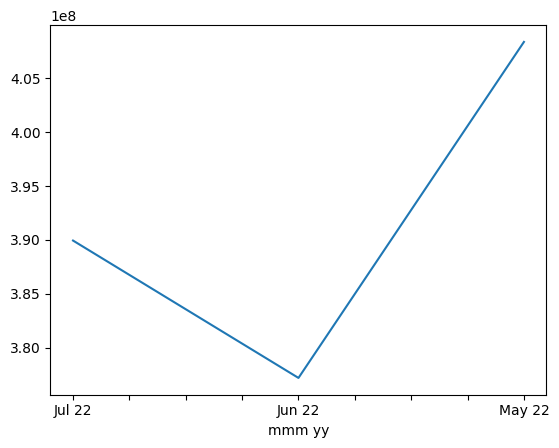

In [104]:
monthly_rev_realized.plot(kind="line")

In [105]:
#Revenue realized per booking platform

<Axes: ylabel='revenue_realized'>

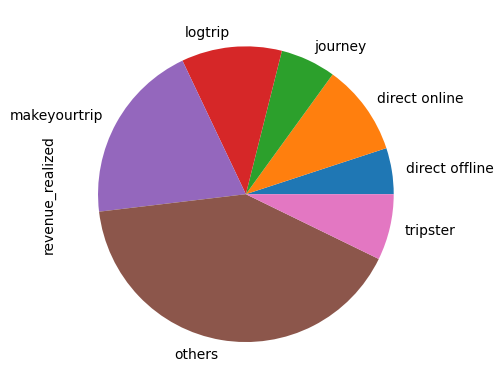

In [106]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")